# インポート

In [2]:
import create_population
import pandas as pd
from pathlib import Path
import create_population
from feature_producing import FeatureCreator
from training import Trainer
from evaluationing import Evaluator
%load_ext autoreload


In [43]:
%autoreload

# 学習母集団の作成
期間を指定すると、学習母集団である（日付、race_id、horse_id）の組みを作る

In [66]:
population = create_population.create(
    from_ ="2023-01-01",
    to_ = "2023-12-31",
)

In [ ]:
# 各年の数を確認
population["date"].dt.year.value_counts().sort_index()

date
2018    48604
2019    47574
2020    48282
2021    47821
2022    47220
2023    47672
Name: count, dtype: int64

# データ加工

In [4]:
import preprocessing
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
df["horse_id"].nunique()

22

In [14]:
%autoreload

In [74]:
#レース結果テーブルの前処理
results_preprocessd = preprocessing.process_results()

In [13]:
# 重複チェック
results_preprocessd.duplicated(subset=["race_id", "horse_id"]).sum()

np.int64(0)

In [76]:
# 欠損チェック
results_preprocessd.isnull().sum()

race_id        0
horse_id       0
jockey_id      0
trainer_id     0
owner_id       0
rank           0
umaban         0
wakuban        0
tansyo_odds    0
popularity     0
kinryou        0
sex            0
age            0
weight         0
weight_diff    0
dtype: int64

In [8]:
# 馬の過去成績テーブルの前処理
horse_results_preprocessd = preprocessing.process_horse_results()

In [9]:
horse_results_preprocessd

,horse_id,date,rank,prize,rank_diff,weather,race_type,course_len,ground_condition,race_class,n_horses
0,2021101429,2024-11-09,9.0,0.0,0.2,0.0,1,1400,0.0,4.0,14.0
1,2021101429,2024-10-06,1.0,1140.0,0.0,1.0,1,1400,0.0,3.0,13.0
2,2021101429,2024-09-01,2.0,625.2,0.4,0.0,1,1400,0.0,5.0,7.0
3,2021101429,2024-08-10,2.0,629.2,0.0,0.0,1,1400,0.0,5.0,14.0
4,2021101429,2024-04-06,13.0,0.0,0.9,1.0,1,1600,1.0,7.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...
711582,2019100398,2022-01-27,2.0,52.0,0.4,1.0,0,1400,0.0,NaN,6.0
711583,2019100398,2022-01-04,2.0,48.0,0.0,0.0,0,1400,0.0,NaN,9.0
711584,2019100398,2021-12-16,1.0,70.0,0.0,0.0,0,1400,0.0,1.0,9.0
711585,2019100398,2021-10-26,2.0,14.0,0.1,1.0,0,1000,1.0,1.0,12.0


In [10]:
# 形式、欠損値を確認
horse_results_preprocessd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700274 entries, 0 to 711586
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   horse_id          700274 non-null  int64         
 1   date              700274 non-null  datetime64[ns]
 2   rank              700274 non-null  float64       
 3   prize             700274 non-null  float64       
 4   rank_diff         699553 non-null  float64       
 5   weather           699658 non-null  float64       
 6   race_type         700274 non-null  int64         
 7   course_len        700274 non-null  int64         
 8   ground_condition  700269 non-null  float64       
 9   race_class        337222 non-null  float64       
 10  n_horses          700266 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 64.1 MB


In [83]:
# 欠損チェック
horse_results_preprocessd.isnull().sum()

horse_id                0
date                    0
rank                    0
prize                   0
rank_diff             260
weather               219
race_type               0
course_len              0
ground_condition        4
race_class          60543
n_horses                0
dtype: int64

In [16]:
%autoreload

In [17]:
# レース情報テーブルの加工
race_info_preprocess  = preprocessing.process_race_info()

In [12]:
race_info_preprocess

,race_id,date,race_type,around,course_len,weather,ground_state,race_class,place
0,201801010101,2018-07-28,1,0.0,1800,0,0.0,1.0,1
1,201801010102,2018-07-28,0,0.0,1000,0,0.0,1.0,1
2,201801010103,2018-07-28,0,0.0,2400,0,0.0,1.0,1
3,201801010104,2018-07-28,0,0.0,1700,0,0.0,1.0,1
4,201801010105,2018-07-28,1,0.0,1500,0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...
20725,202310030808,2023-09-03,0,0.0,1000,0,0.0,2.0,10
20726,202310030809,2023-09-03,1,0.0,1200,0,0.0,3.0,10
20727,202310030810,2023-09-03,0,0.0,1700,0,0.0,4.0,10
20728,202310030811,2023-09-03,1,0.0,1200,0,0.0,6.0,10


In [18]:
# 欠損チェック
race_info_preprocess.isnull().sum()

race_id                0
date                   0
race_type              0
around               897
course_len           161
weather                0
ground_condition    4787
race_class          1886
place                  0
dtype: int64

In [74]:
# 血統テーブルの加工
import preprocessing

In [75]:
peds = preprocessing.process_peds()

In [78]:
peds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35426 entries, 0 to 35425
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   (horse_id,)  35426 non-null  int64 
 1   (sire_id,)   35426 non-null  object
 2   (bms_id,)    35426 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [79]:
sire_leaidng = preprocessing.process_sire_leading()

In [88]:
sire_leaidng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   page_id     2862 non-null   object 
 1   sire_id     2862 non-null   int64  
 2   year        2862 non-null   int64  
 3   race_type   2862 non-null   int64  
 4   n_races     2862 non-null   float64
 5   n_wins      2862 non-null   float64
 6   course_len  2862 non-null   float64
 7   winrate     2520 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 179.0+ KB


# 特徴量作成

In [ ]:
from feature_producing import FeatureCreator
%load_ext autoreload

In [ ]:
%autoreload

In [88]:
fp = FeatureCreator()
features = fp.create_features()

In [89]:
# 重複チェック
features.duplicated(subset=["race_id", "horse_id"]).sum()

0

# 学習

In [ ]:
from training import Trainer
%load_ext autoreload

In [97]:
%autoreload

In [ ]:
trainer = Trainer()
%load_ext autoreload

In [ ]:
trainer = Trainer(config_filepath="config.yaml")
evaluation_df = trainer.run(
    valid_start_date="2022-10-01",
    test_start_date="2023-01-01",
    importance_filename="importance_new.csv",
    evaluation_filename="evaluation_new.csv"

[100]	training's binary_logloss: 0.153178	valid_1's binary_logloss: 0.206081


# 精度評価

In [1]:
from evaluationing import Evaluator
%load_ext autoreload

In [ ]:
%autoreload

In [2]:
evaluator = Evaluator()

In [ ]:
evaluator = Evaluator(evaluation_filename="evaluation_5year.csv")


# 予測

In [4]:
df = pd.read_csv("../data/03_train/evaluation_course.csv",sep="\t")
df

,race_id,horse_id,target,rank,tansyo_odds,popularity,umaban,pred
0,202301010101,2021101429,1,1,1.2,1,5,0.620179
1,202301010101,2021105872,0,2,4.1,2,8,0.171050
2,202301010101,2021106854,0,3,59.9,6,6,0.013518
3,202301010101,2021105553,0,4,16.6,3,4,0.062265
4,202301010101,2021100648,0,5,23.9,5,1,0.021018
...,...,...,...,...,...,...,...,...
47268,202310030812,2020105644,0,8,62.8,11,1,0.009409
47269,202310030812,2018106584,0,9,125.6,12,7,0.002638
47270,202310030812,2020101781,0,10,9.8,5,2,0.058724
47271,202310030812,2019106647,0,11,37.2,10,4,0.008369


In [6]:
df["expect_return"] = df["tansyo_odds"] * df["pred"]
df

,race_id,horse_id,target,rank,tansyo_odds,popularity,umaban,pred,expect_return
0,202301010101,2021101429,1,1,1.2,1,5,0.620179,0.744215
1,202301010101,2021105872,0,2,4.1,2,8,0.171050,0.701305
2,202301010101,2021106854,0,3,59.9,6,6,0.013518,0.809755
3,202301010101,2021105553,0,4,16.6,3,4,0.062265,1.033594
4,202301010101,2021100648,0,5,23.9,5,1,0.021018,0.502319
...,...,...,...,...,...,...,...,...,...
47268,202310030812,2020105644,0,8,62.8,11,1,0.009409,0.590891
47269,202310030812,2018106584,0,9,125.6,12,7,0.002638,0.331271
47270,202310030812,2020101781,0,10,9.8,5,2,0.058724,0.575491
47271,202310030812,2019106647,0,11,37.2,10,4,0.008369,0.311310


In [9]:
bet_df = df.query("expect_return > 1.0")
bet_df

,race_id,horse_id,target,rank,tansyo_odds,popularity,umaban,pred,expect_return
3,202301010101,2021105553,0,4,16.6,3,4,0.062265,1.033594
11,202301010102,2020104346,0,4,8.6,4,4,0.142034,1.221493
15,202301010102,2020104250,0,8,17.0,6,6,0.062836,1.068217
17,202301010102,2020106395,0,10,22.0,7,11,0.056393,1.240656
23,202301010103,2020105632,0,4,6.2,4,3,0.168365,1.043863
...,...,...,...,...,...,...,...,...,...
47185,202310030806,2020102750,0,14,47.5,13,13,0.024551,1.166194
47196,202310030807,2018110113,0,9,45.8,13,5,0.031480,1.441802
47207,202310030808,2020102702,0,2,2.6,1,4,0.386141,1.003966
47228,202310030809,2020100815,0,10,2.2,1,6,0.514041,1.130890


In [10]:
# 実際にtarget = 1の馬に賭けた場合の収益を計算してみる（１円かけたとき）
bet_df["payoff"] = bet_df["tansyo_odds"] * bet_df["target"]
bet_df

C:\Users\Onoe Daichi\AppData\Local\Temp\ipykernel_15580\2100538659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bet_df["payoff"] = bet_df["tansyo_odds"] * bet_df["target"]


,race_id,horse_id,target,rank,tansyo_odds,popularity,umaban,pred,expect_return,payoff
3,202301010101,2021105553,0,4,16.6,3,4,0.062265,1.033594,0.0
11,202301010102,2020104346,0,4,8.6,4,4,0.142034,1.221493,0.0
15,202301010102,2020104250,0,8,17.0,6,6,0.062836,1.068217,0.0
17,202301010102,2020106395,0,10,22.0,7,11,0.056393,1.240656,0.0
23,202301010103,2020105632,0,4,6.2,4,3,0.168365,1.043863,0.0
...,...,...,...,...,...,...,...,...,...,...
47185,202310030806,2020102750,0,14,47.5,13,13,0.024551,1.166194,0.0
47196,202310030807,2018110113,0,9,45.8,13,5,0.031480,1.441802,0.0
47207,202310030808,2020102702,0,2,2.6,1,4,0.386141,1.003966,0.0
47228,202310030809,2020100815,0,10,2.2,1,6,0.514041,1.130890,0.0


In [12]:
# 回収率
total_payoff = bet_df["payoff"].sum()
total_bet = len(bet_df)
return_rate = total_payoff / total_bet
total_payoff, total_bet, return_rate

(np.float64(1794.5), 1864, np.float64(0.9627145922746781))

In [24]:
import numpy as np

np.linspace(0.8, 2, 100)

array([0.8       , 0.81212121, 0.82424242, 0.83636364, 0.84848485,
       0.86060606, 0.87272727, 0.88484848, 0.8969697 , 0.90909091,
       0.92121212, 0.93333333, 0.94545455, 0.95757576, 0.96969697,
       0.98181818, 0.99393939, 1.00606061, 1.01818182, 1.03030303,
       1.04242424, 1.05454545, 1.06666667, 1.07878788, 1.09090909,
       1.1030303 , 1.11515152, 1.12727273, 1.13939394, 1.15151515,
       1.16363636, 1.17575758, 1.18787879, 1.2       , 1.21212121,
       1.22424242, 1.23636364, 1.24848485, 1.26060606, 1.27272727,
       1.28484848, 1.2969697 , 1.30909091, 1.32121212, 1.33333333,
       1.34545455, 1.35757576, 1.36969697, 1.38181818, 1.39393939,
       1.40606061, 1.41818182, 1.43030303, 1.44242424, 1.45454545,
       1.46666667, 1.47878788, 1.49090909, 1.5030303 , 1.51515152,
       1.52727273, 1.53939394, 1.55151515, 1.56363636, 1.57575758,
       1.58787879, 1.6       , 1.61212121, 1.62424242, 1.63636364,
       1.64848485, 1.66060606, 1.67272727, 1.68484848, 1.69696

In [16]:
df["payoff"] = df["tansyo_odds"] * df["target"]

In [19]:
# defaultdictで新しいからのものを用意してくれる。今回はリスト。普通の辞書型ではappendする際すでにリストに入っている状態を想定しているので使えない
from collections import defaultdict

result = defaultdict(list)
for exp in np.linspace(0.8, 2, 100):
    bet_df = df.query(f"expect_return > {exp}")
    total_payoff = bet_df["payoff"].sum()
    total_bet = len(bet_df)
    return_rate = total_payoff / total_bet
    result["expect_return"].append(exp)
    result["total_bet"].append(total_bet)
    result["total_payoff"].append(total_payoff)
    result["return_rate"].append(return_rate)
    # print(exp, total_payoff, total_bet, return_rate)
result_df = pd.DataFrame(result)
result_df

,expect_return,total_bet,total_payoff,return_rate
0,0.800000,6164,5311.4,0.861681
1,0.812121,5756,4820.0,0.837387
2,0.824242,5383,4426.8,0.822367
3,0.836364,5041,4235.8,0.840270
4,0.848485,4702,3984.6,0.847427
...,...,...,...,...
95,1.951515,31,0.0,0.000000
96,1.963636,31,0.0,0.000000
97,1.975758,31,0.0,0.000000
98,1.987879,30,0.0,0.000000


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

<Axes: xlabel='expect_return', ylabel='return_rate'>

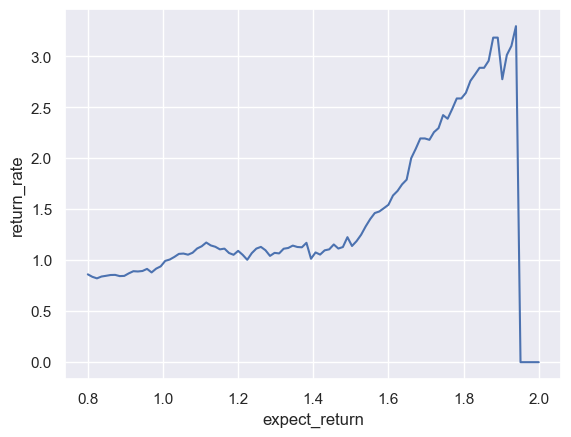

In [21]:
sns.lineplot(result_df, x = "expect_return", y = "return_rate")

In [22]:
result_df.sort_values("return_rate", ascending=False).head()

,expect_return,total_bet,total_payoff,return_rate
94,1.939394,32,105.5,3.296875
90,1.890909,39,124.2,3.184615
89,1.878788,39,124.2,3.184615
93,1.927273,34,105.5,3.102941
92,1.915152,35,105.5,3.014286


# キャリブレーション・プロット

## どれくらい予測が信頼できるのか

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [26]:
df = pd.read_csv("../data/03_train/evaluation_course.csv",sep="\t")
df

,race_id,horse_id,target,rank,tansyo_odds,popularity,umaban,pred
0,202301010101,2021101429,1,1,1.2,1,5,0.620179
1,202301010101,2021105872,0,2,4.1,2,8,0.171050
2,202301010101,2021106854,0,3,59.9,6,6,0.013518
3,202301010101,2021105553,0,4,16.6,3,4,0.062265
4,202301010101,2021100648,0,5,23.9,5,1,0.021018
...,...,...,...,...,...,...,...,...
47268,202310030812,2020105644,0,8,62.8,11,1,0.009409
47269,202310030812,2018106584,0,9,125.6,12,7,0.002638
47270,202310030812,2020101781,0,10,9.8,5,2,0.058724
47271,202310030812,2019106647,0,11,37.2,10,4,0.008369


In [29]:
# predの分布を２０個の範囲に区切る
pd.cut(df["pred"], bins=20).value_counts()

pred
(-0.000841, 0.043]    30145
(0.043, 0.086]         6642
(0.086, 0.129]         3539
(0.129, 0.172]         2171
(0.172, 0.215]         1413
(0.215, 0.258]          977
(0.258, 0.301]          692
(0.301, 0.344]          490
(0.344, 0.387]          360
(0.387, 0.43]           244
(0.43, 0.473]           182
(0.473, 0.516]          119
(0.516, 0.559]           72
(0.559, 0.602]           64
(0.602, 0.645]           57
(0.645, 0.688]           49
(0.731, 0.774]           23
(0.688, 0.731]           22
(0.774, 0.817]           11
(0.817, 0.86]             1
Name: count, dtype: int64

In [30]:
df["pred_bins"] = pd.cut(df["pred"], bins=20)
df.head()

,race_id,horse_id,target,rank,tansyo_odds,popularity,umaban,pred,pred_bins
0,202301010101,2021101429,1,1,1.2,1,5,0.620179,"(0.602, 0.645]"
1,202301010101,2021105872,0,2,4.1,2,8,0.171050,"(0.129, 0.172]"
2,202301010101,2021106854,0,3,59.9,6,6,0.013518,"(-0.000841, 0.043]"
3,202301010101,2021105553,0,4,16.6,3,4,0.062265,"(0.043, 0.086]"
4,202301010101,2021100648,0,5,23.9,5,1,0.021018,"(-0.000841, 0.043]"


In [31]:
# pred_binsが同じもの同士その時のtargetをグループ化。その後、平均を取る
df.groupby("pred_bins")["target"].mean()

C:\Users\Onoe Daichi\AppData\Local\Temp\ipykernel_15580\1667185272.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("pred_bins")["target"].mean()


pred_bins
(-0.000841, 0.043]    0.019638
(0.043, 0.086]        0.088226
(0.086, 0.129]        0.125459
(0.129, 0.172]        0.169968
(0.172, 0.215]        0.227176
(0.215, 0.258]        0.243603
(0.258, 0.301]        0.296243
(0.301, 0.344]        0.328571
(0.344, 0.387]        0.388889
(0.387, 0.43]         0.422131
(0.43, 0.473]         0.461538
(0.473, 0.516]        0.445378
(0.516, 0.559]        0.416667
(0.559, 0.602]        0.546875
(0.602, 0.645]        0.526316
(0.645, 0.688]        0.653061
(0.688, 0.731]        0.545455
(0.731, 0.774]        0.739130
(0.774, 0.817]        0.636364
(0.817, 0.86]         0.000000
Name: target, dtype: float64

In [32]:
# 各便ビンごとの予測勝率の平均値で代表化する
df["pred_mean"] = df.groupby("pred_bins")["pred"].transform("mean")
df

C:\Users\Onoe Daichi\AppData\Local\Temp\ipykernel_15580\3744000504.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df["pred_mean"] = df.groupby("pred_bins")["pred"].transform("mean")


,race_id,horse_id,target,rank,tansyo_odds,popularity,umaban,pred,pred_bins,pred_mean
0,202301010101,2021101429,1,1,1.2,1,5,0.620179,"(0.602, 0.645]",0.623572
1,202301010101,2021105872,0,2,4.1,2,8,0.171050,"(0.129, 0.172]",0.148707
2,202301010101,2021106854,0,3,59.9,6,6,0.013518,"(-0.000841, 0.043]",0.011332
3,202301010101,2021105553,0,4,16.6,3,4,0.062265,"(0.043, 0.086]",0.062051
4,202301010101,2021100648,0,5,23.9,5,1,0.021018,"(-0.000841, 0.043]",0.011332
...,...,...,...,...,...,...,...,...,...,...
47268,202310030812,2020105644,0,8,62.8,11,1,0.009409,"(-0.000841, 0.043]",0.011332
47269,202310030812,2018106584,0,9,125.6,12,7,0.002638,"(-0.000841, 0.043]",0.011332
47270,202310030812,2020101781,0,10,9.8,5,2,0.058724,"(0.043, 0.086]",0.062051
47271,202310030812,2019106647,0,11,37.2,10,4,0.008369,"(-0.000841, 0.043]",0.011332


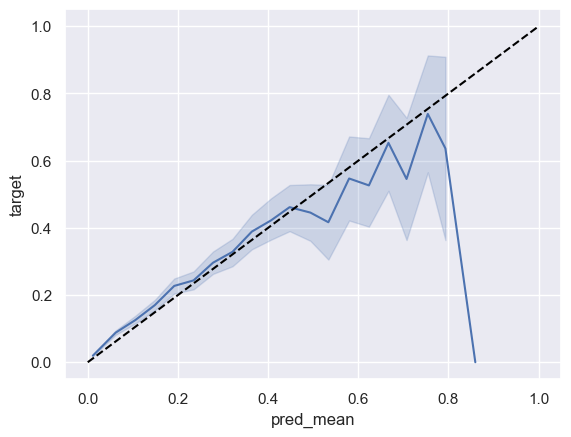

In [36]:
sns.lineplot(data=df, x="pred_mean", y="target")
sns.lineplot(x =[0,1], y=[0,1], color="black", linestyle = "--")
plt.show()

キャリブレーションプロット：
    ・モデルの予測確率が実際の観測確率とどれだけ一致しているかを視覚的に確認するためのグラフ

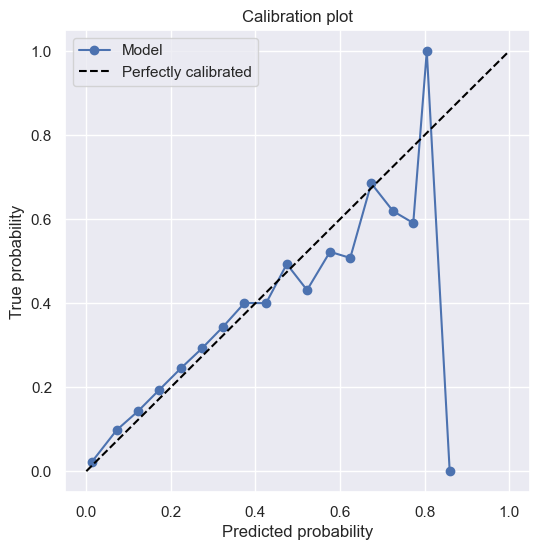

In [43]:
from sklearn.calibration import calibration_curve

# predとtargetを使ってキャリブレーションカーブを計算
prob_true, prob_pred = calibration_curve(df["target"], df["pred"], n_bins=20)

# キャリブレーションプロットを描く
plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--',color ="black", label='Perfectly calibrated')
plt.xlabel('Predicted probability')
plt.ylabel('True probability')
plt.title('Calibration plot')
plt.legend()
plt.show()

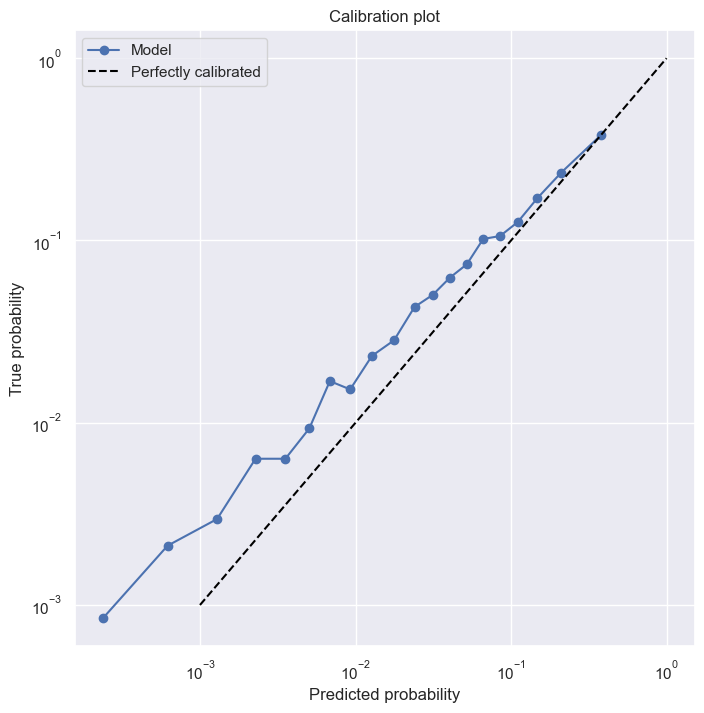

In [42]:
from sklearn.calibration import calibration_curve

# predとtargetを使ってキャリブレーションカーブを計算
prob_true, prob_pred = calibration_curve(
    df["target"], df["pred"], n_bins=20, strategy="quantile")

# キャリブレーションプロットを描く
plt.figure(figsize=(8, 8))
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0.001, 1], [0.001, 1], linestyle='--',color ="black", label='Perfectly calibrated')
plt.xlabel('Predicted probability')
plt.ylabel('True probability')
plt.title('Calibration plot')
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

In [39]:
prob_pred

array([0.01289769, 0.07193305, 0.1225704 , 0.17281303, 0.2234864 ,
       0.27345308, 0.32356078, 0.3740898 , 0.425228  , 0.47423845,
       0.52210601, 0.57639681, 0.62428984, 0.67404537, 0.72567775,
       0.77337933, 0.8053419 , 0.85953671])

ブライアスコア：
    予測確率が正確なほど小さくなる

In [68]:
from sklearn.metrics import brier_score_loss

brier_score_loss(df["target"], df["pred"])

np.float64(0.05892663927125041)

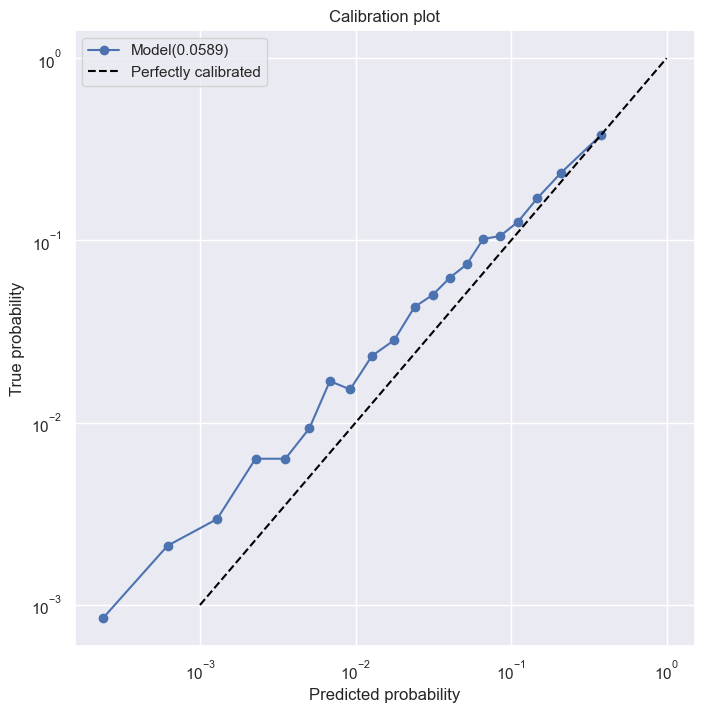

In [60]:
brier_score_loss = brier_score_loss(df["target"], df["pred"])
# predとtargetを使ってキャリブレーションカーブを計算
prob_true, prob_pred = calibration_curve(
    df["target"], df["pred"], n_bins=20, strategy="quantile")

# キャリブレーションプロットを描く
plt.figure(figsize=(8, 8))
plt.plot(
    prob_pred, prob_true, marker='o', label=f'Model({brier_score_loss:.4f})'
)
plt.plot([0.001, 1], [0.001, 1], linestyle='--',color ="black", label='Perfectly calibrated')
plt.xlabel('Predicted probability')
plt.ylabel('True probability')
plt.title('Calibration plot')
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

## 単勝オッズと勝率の関係

<Axes: xlabel='odds_prob', ylabel='Count'>

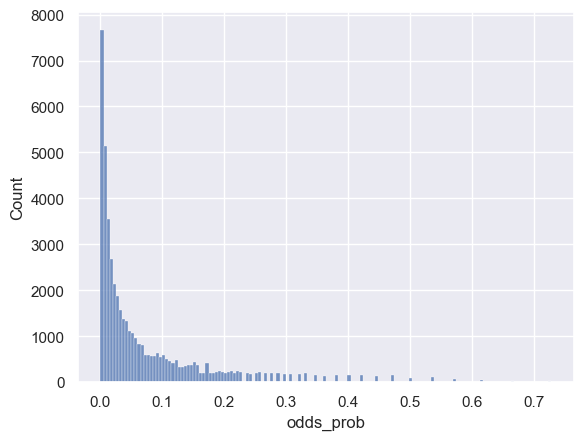

In [63]:
df["odds_prob"] = 0.8 / df["tansyo_odds"]
sns.histplot(data=df, x="odds_prob", )

In [66]:
def plot_calibration(df,pred_col="pred", target_col="target", bins=20, strategy="quantile"):
    brier_score = brier_score_loss(df[target_col], df[pred_col])
    prob_true, prob_pred = calibration_curve(
        df[target_col], df[pred_col], n_bins=bins, strategy="quantile"
    )
    plt.figure(figsize=(8, 8))
    plt.plot(
        prob_pred, prob_true, marker='o', label=f'Model({brier_score:.4f})'
    )
    plt.plot([0.001, 1], [0.001, 1], linestyle='--',color ="black", label='Perfectly calibrated')
    plt.xlabel('Predicted probability')
    plt.ylabel('True probability')
    plt.title('Calibration plot')
    if strategy == "quantile":
        plt.xscale("log")
        plt.yscale("log")
    plt.legend()
    plt.show()

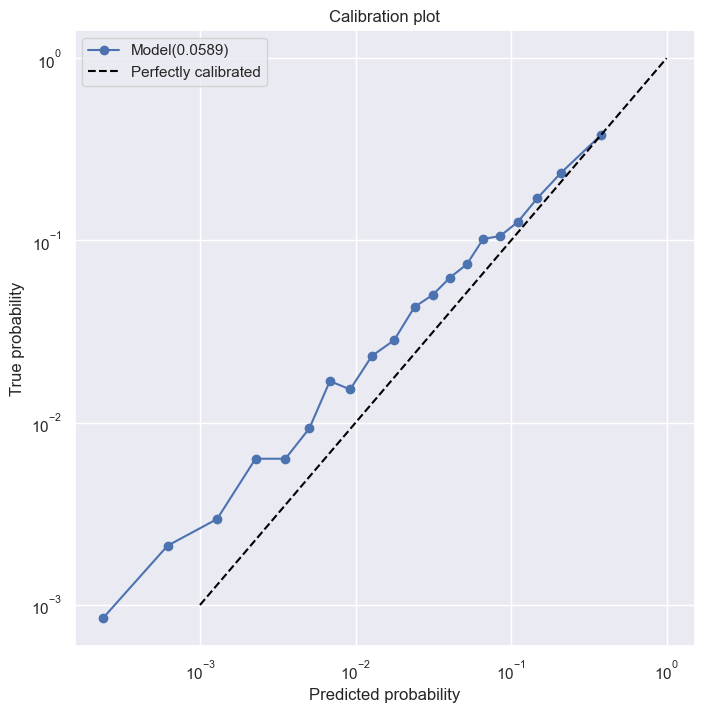

In [69]:
plot_calibration(df)

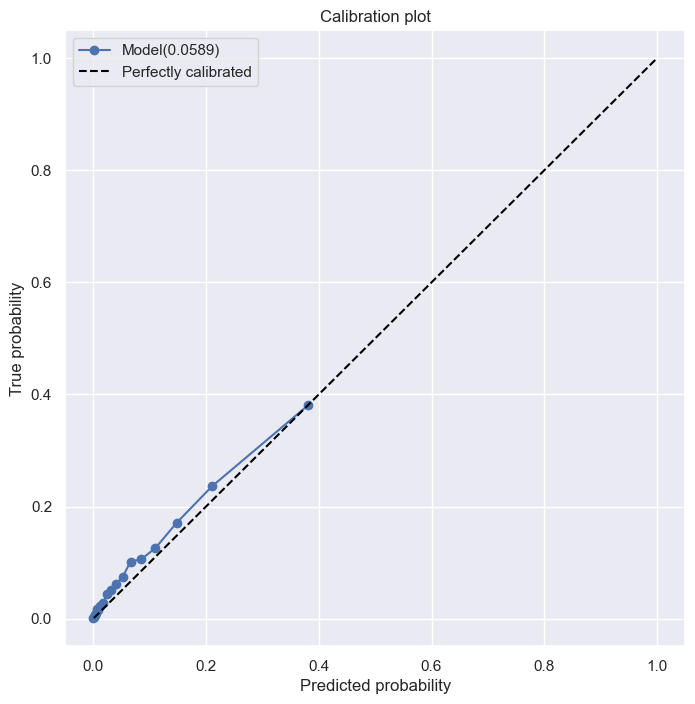

In [70]:
plot_calibration(df, strategy="uniform")

## 低勝率帯を切り捨てる

In [73]:
evaluator = Evaluator()

In [ ]:
result_df = evaluator.bet_by_expect_return(df, 0.8, 2, 100)